In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax
import get_initialization_cond as init
import optimization_SPDC as opt
import jaxopt
import jax.scipy.optimize as optimize
import numpy as np

key = jax.random.PRNGKey(0)

In [9]:
Np = 0.01
# higher N and wf+wi makes less unstable pump... need to see if N or wf+wi influences more
N = 601
wi = -10
wf = 10
x = jnp.linspace(wi, wf, N)
freq_range_pump = jnp.linspace(2*wi, 2*wf, 2*N)
freq_range_pump_complex = jnp.concatenate((freq_range_pump, freq_range_pump)).reshape(4*N,)
vp = 0.1
l = 1
# For an unstable pump, just change amplitude to 0.2 and width to 0.2 at N = 1
hermite_init_params = [2, 0.05, 0.3, jnp.pi/5]
cst_init_params = [0.1]
alpha, G, H = init.get_constants(vp, l, wi, wf, Np, N = N)
# get the initialization seeds
initial_value_gauss = jnp.array([0.5, 1., 2*jnp.pi/7])
arbitrary_seed_hermite = init.get_initialization_array(hermite_init_params, vp, l, wi, wf, Np, method='hermite', N = N)
random_seed = 0.01*jax.random.uniform(key, shape=(4*N,))
phi = 2*jnp.pi*jax.random.uniform(key)
y_N = 3

In [10]:
solver_K = jaxopt.PolyakSGD(opt.get_loss_K, maxiter=5, verbose=1)
solver_N = jaxopt.PolyakSGD(opt.get_loss_N, maxiter=20, verbose=1)   
solver = jaxopt.PolyakSGD(opt.get_loss, maxiter=100, verbose=1) 

In [11]:
pump = random_seed.copy()
(pump, state) = solver.run(pump, N, alpha, G, H, l, freq_range_pump, y_N)

error: 233.29456
error: 106.74364
error: 55.553734
error: 30.79728
error: 27.312052
error: 12.766126
error: 8.685063
error: 12.58483
error: 6.2674246
error: 15.265792
error: 1.4590527
error: 6.5515904
error: 17.08978
error: 3.2920105
error: 37.33497
error: 14.097241
error: 0.7087392
error: 15.60777
error: 2.2511408
error: 19.230494
error: 7.7133956
error: 4.475151
error: 10.362629
error: 0.5874834
error: 21.602139
error: 9.926852
error: 0.5103174
error: 43.609337
error: 18.889776
error: 6.1769114
error: 4.488729
error: 8.700709
error: 1.2322637
error: 45.95196
error: 20.182957
error: 7.226856
error: 2.411493
error: 19.202938
error: 6.7910547
error: 2.606681
error: 16.579851
error: 5.2900267
error: 4.60256
error: 6.602453
error: 2.691544
error: 15.402316
error: 4.616035
error: 5.6687446
error: 3.984735
error: 6.9696646
error: 1.8152424
error: 15.537058
error: 6.1443458
error: 2.9452264
error: 9.726589
error: 1.5068866
error: 31.83492
error: 13.631783
error: 3.6650417
error: 7.2889585
er

In [4]:
pump = random_seed.copy()
for i in range(10):
    print("Loop " + str(i) + " for K")
    (pump, state) = solver_K.run(pump, N, alpha, G, H, l, freq_range_pump)
    print("Loop " + str(i) + " for N")
    (pump, state) = solver_N.run(pump, N, alpha, G, H, l, y_N)

Loop 0 for K
error: 233.16864



KeyboardInterrupt



(DeviceArray(2.7825985, dtype=float32), DeviceArray(1.095045, dtype=float32))

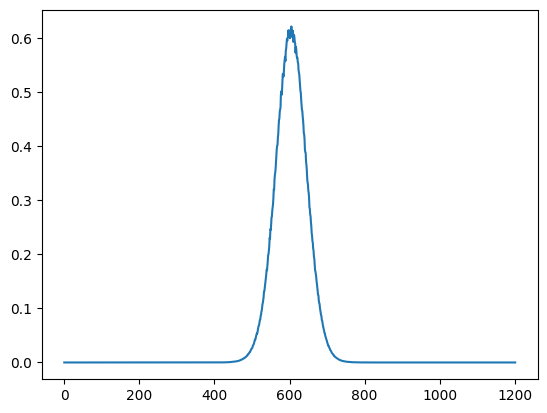

In [12]:
plt.plot(jnp.abs(opt.get_complex_array(pump)))
#plt.plot(jnp.angle(opt.get_complex_array(pump)))
opt.get_observables(pump, N, alpha, G, H, l)

(DeviceArray(5.000048, dtype=float32), DeviceArray(1.2693273, dtype=float32))

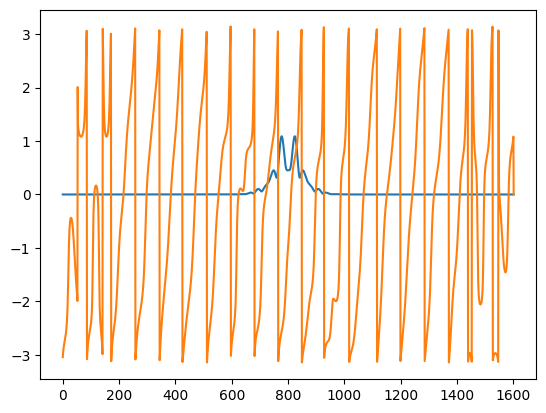

In [26]:
plt.plot(jnp.abs(opt.get_complex_array(pump)))
plt.plot(jnp.angle(opt.get_complex_array(pump)))
opt.get_observables(pump, N, alpha, G, H, l)

In [19]:
opt.get_loss_N(arbitrary_seed_hermite_order_1, N, alpha, G, H, l, y_N)

DeviceArray(1.5572517, dtype=float32)

In [7]:
# first attempt


DeviceArray(2.6292431, dtype=float32)

In [ ]:
# Try get a hang of using Greens function
